In [1]:
import numpy as np 
import pandas as pd 
import os
from keras import layers
from keras import models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from os import listdir, makedirs
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
# from keras.applications import VGG16, ResNet50, VGG19, InceptionV3, MobileNetV2
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, Activation, MaxPooling2D, BatchNormalization
from keras import optimizers, regularizers
from tensorflow.keras.optimizers import SGD
from glob import glob
import cv2
import glob
from keras import backend as K
import numpy as np 
import pandas as pd 
import os
from keras import layers
from keras import models, Sequential
import matplotlib.pyplot as plt
from os import listdir, makedirs
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.preprocessing.image import load_img
from keras import optimizers, regularizers
from glob import glob
import cv2
from keras.callbacks import EarlyStopping, Callback
from keras.preprocessing import image
from keras.applications.inception_v3 import preprocess_input
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
from keras.models import load_model
import h5py
from PIL import Image
from sklearn.model_selection import train_test_split

In [2]:
print(os.listdir('/Users/rutviktarikere/Desktop/statefarm/'))
data_dir = '/Users/rutviktarikere/Desktop/statefarm/'

['imgs', '.sample_submission.csv.icloud', 'driver_imgs_list.csv']


In [3]:
RESOLUTION = 150
BATCH_SIZE = 64

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.3,)
val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.3)

train_generator = train_datagen.flow_from_directory('/Users/rutviktarikere/Desktop/statefarm/imgs/train/', target_size=(160, 120), batch_size=BATCH_SIZE, class_mode='categorical', subset="training", color_mode='grayscale')
val_generator = val_datagen.flow_from_directory('/Users/rutviktarikere/Desktop/statefarm/imgs/train/', target_size=(160, 120), batch_size=BATCH_SIZE, class_mode='categorical', subset="validation",  color_mode='grayscale')

Found 15702 images belonging to 10 classes.
Found 6722 images belonging to 10 classes.


In [4]:
def read_image(path):
    image = cv2.imread(path, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

labels = ['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']
col = {'c0': 'safe driving', 'c1': 'texting - right', 'c2': 'talking on the phone - right', 'c3': 'texting - left', 'c4': 'talking on the phone - left', 'c5':'operating the radio', 'c6': 'drinking', 'c7': 'reaching behind', 'c8': 'hair and makeup', 'c9': 'talking to passenger'}

In [ ]:
# skip
for label in labels:
    f, ax = plt.subplots(figsize=(12, 10))
    files = glob('{}/train/{}/*.jpg'.format(data_dir, label))
    
    print('\t\t\t\t# {} : {}'.format(label, col[label]))
    for x in range(9):
        plt.subplot(3, 3, x+1)
        image = read_image(files[x])
        plt.imshow(image)
        plt.axis('off')
    plt.show()

In [5]:
def create_model():
    model = Sequential()
    # Use Batch Normalization for every conv and dense layers
    model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu', input_shape = (160, 120, 1)))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(128, kernel_size = (3,3), activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    model.add(Conv2D(128, kernel_size = (3,3), activation = 'relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(64, activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.33))
    model.add(Dense(32, activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Dense(10, activation = 'softmax')) 
    model.compile(loss= 'categorical_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])
    return model

In [6]:
def train(model, filepath):
    checkpoint = ModelCheckpoint(filepath, monitor = 'val_accuracy', verbose = 1, save_best_only  = True, mode = 'max')
    callbacks_list = [checkpoint]
    
    n_train = 15702
    batch_size = 300
    n_valid = 6722
    history = model.fit_generator(
           train_generator,
           steps_per_epoch=n_train//batch_size,
           epochs=10,
           validation_data=val_generator,
           validation_steps=n_valid//batch_size,  callbacks=callbacks_list)
    
    
    # Plot
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

    return model

/Users/rutviktarikere/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
52/52 [==============================] - 912s 17s/step - loss: 2.1863 - accuracy: 0.2704 - val_loss: 3.5177 - val_accuracy: 0.0959

Epoch 00001: val_accuracy improved from -inf to 0.09588, saving model to weights_best.h5
Epoch 2/10
52/52 [==============================] - 1003s 19s/step - loss: 0.8878 - accuracy: 0.7856 - val_loss: 23.0862 - val_accuracy: 0.0838

Epoch 00002: val_accuracy did not improve from 0.09588
Epoch 3/10
52/52 [==============================] - 748s 14s/step - loss: 0.4618 - accuracy: 0.9188 - val_loss: 54.2089 - val_accuracy: 0.0923

Epoch 00003: val_accuracy did not improve from 0.09588
Epoch 4/10
52/52 [==============================] - 688s 13s/step - loss: 0.2494 - accuracy: 0.9670 - val_loss: 5.2841 - val_accuracy: 0.1016

Epoch 00004: val_accuracy improved from 0.09588 to 0.10156, saving model to weights_best.h5
Epoch 5/10
52/52 [==============================] - 690s 13s/step - loss: 0.1962 - accuracy: 0.9686 - val_loss: 6.7321 - val_accuracy:

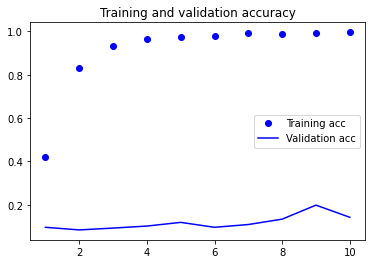

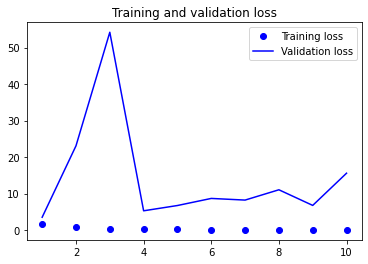

In [7]:
# model = create_model()
model = train(create_model(), "weights_best.h5")